# Pytorch Lightning

### Différences Clés avec la Version PyTorch Classique

1. **Modèle Lightning**
   - Hérite de `pl.LightningModule`
   - Méthodes `training_step()` et `validation_step()` remplacent la boucle d'entraînement manuelle
   - Logging automatique des métriques
   - `save_hyperparameters()` pour un suivi facile

2. **Trainer**
   - Gère automatiquement l'entraînement
   - Détection automatique du matériel (GPU/CPU)
   - Simplification du code d'entraînement

3. **Métriques**
   - Utilisation des métriques de PyTorch Lightning
   - Tracking automatique de la précision

### Dépendances
```bash
pip install torch torchvision pytorch-lightning matplotlib
```

### Fonctionnalités Principales
- Visualisation des données
- Distribution des classes
- Entraînement simplifié
- Sauvegarde automatique
- Visualisation des inférences

### Nouveautés
- Sauvegarde de checkpoints avec `trainer.save_checkpoint()`
- Méthodes de logging intégrées
- Gestion automatique du matériel

## Installation des dépendances système

In [5]:
!pip install torch torchvision pytorch-lightning torchmetrics matplotlib

## Classe du modèle : MNISTLightningModel

In [6]:
import torch
import torch.nn as nn
import torch.optim as optim
import pytorch_lightning as pl
import torchmetrics

class MNISTLightningModel(pl.LightningModule):
    def __init__(self, input_size=784, hidden_size=128, num_classes=10, lr=0.001):
        super().__init__()
        
        # Sauvegarde automatique des hyperparamètres
        self.save_hyperparameters()
        
        # Définition du modèle
        self.model = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, num_classes)
        )
        
        # Métriques pour le suivi
        self.train_accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes)
        self.val_accuracy = torchmetrics.Accuracy(task='multiclass', num_classes=num_classes)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(logits, y)
        
        # Calcul de la précision
        preds = torch.argmax(logits, dim=1)
        self.train_accuracy(preds, y)
        
        # Logging
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
        self.log('train_accuracy', self.train_accuracy, on_step=True, on_epoch=True, prog_bar=True)
        
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self(x)
        loss = nn.functional.cross_entropy(logits, y)
        
        # Calcul de la précision
        preds = torch.argmax(logits, dim=1)
        self.val_accuracy(preds, y)
        
        # Logging
        self.log('val_loss', loss, on_epoch=True, prog_bar=True)
        self.log('val_accuracy', self.val_accuracy, on_epoch=True, prog_bar=True)
        
        return {'preds': preds, 'targets': y}

    def configure_optimizers(self):
        return optim.Adam(self.parameters(), lr=self.hparams.lr)





## Fonctions de visualisation

In [7]:
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

def visualize_dataset(dataset, num_samples=10):
    """
    Visualiser un échantillon de données du dataset
    """
    plt.figure(figsize=(15, 3))
    
    # Sélectionner un échantillon aléatoire
    indices = np.random.randint(0, len(dataset), num_samples)
    
    for i, idx in enumerate(indices):
        image, label = dataset[idx]
        
        # Convertir le tenseur en image numpy
        img = image.squeeze().numpy()
        
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def analyze_dataset_distribution(dataset):
    """
    Analyser la distribution des classes
    """
    labels = [label for _, label in dataset]
    unique, counts = np.unique(labels, return_counts=True)
    
    plt.figure(figsize=(10, 5))
    plt.bar(unique, counts)
    plt.title('Distribution des Classes')
    plt.xlabel('Classe')
    plt.ylabel('Nombre d\'échantillons')
    plt.xticks(unique)
    
    # Afficher le nombre exact
    for i, count in enumerate(counts):
        plt.text(unique[i], count, str(count), ha='center', va='bottom')
    
    plt.show()

def inference_visualization(model, test_dataset):
    """
    Visualisation des inférences du modèle
    """
    # Préparer un DataLoader
    test_loader = DataLoader(test_dataset, batch_size=10, shuffle=True)
    
    # Mettre le modèle en mode évaluation
    model.eval()
    
    # Récupérer un batch
    with torch.no_grad():
        images, labels = next(iter(test_loader))
        
        # Faire les prédictions
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        
        # Visualisation
        plt.figure(figsize=(15, 3))
        for i in range(10):
            plt.subplot(1, 10, i+1)
            plt.imshow(images[i].squeeze().numpy(), cmap='gray')
            plt.title(f'Prédit: {predicted[i]}\nRéel: {labels[i]}', fontsize=8)
            plt.axis('off')
        
        plt.tight_layout()
        plt.show()


## Utilisation

Visualisation des échantillons :


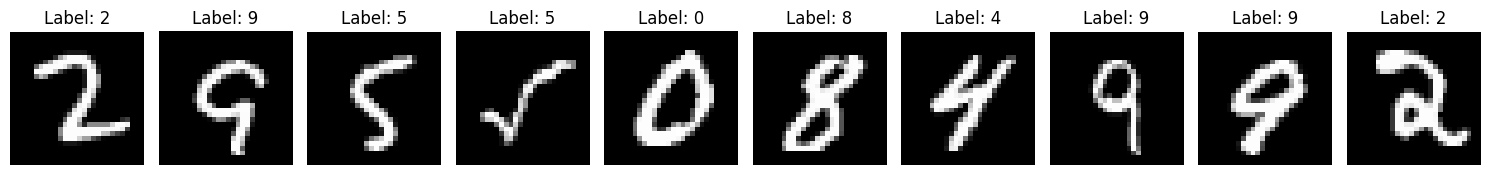


Distribution des classes :


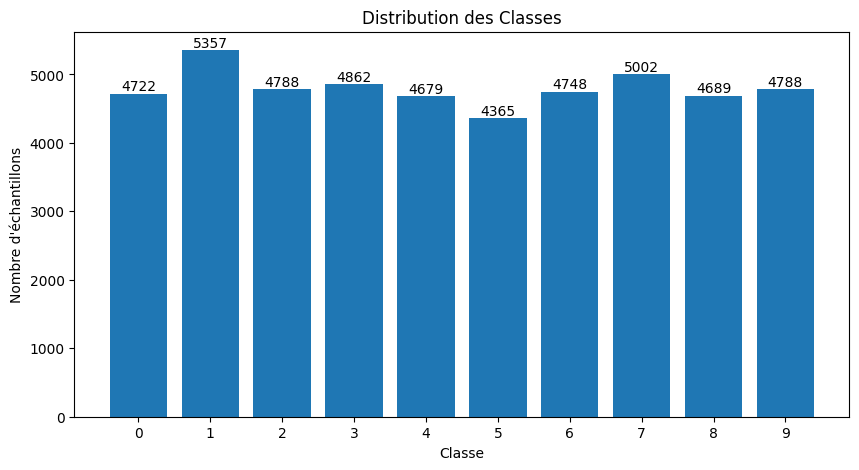

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/home/ebraux/_LOCAL/enseignement/python/python-labs/stock/module/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/logger_connector/logger_connector.py:76: Starting from v1.9.0, `tensorboardX` has been removed as a dependency of the `pytorch_lightning` package, due to potential conflicts with other packages in the ML ecosystem. For this reason, `logger=True` will use `CSVLogger` as the default logger, unless the `tensorboard` or `tensorboardX` packages are found. Please `pip install lightning[extra]` or one of them to enable TensorBoard support by default

  | Name           | Type               | Params | Mode 
--------------------------------------------------------------
0 | model          | Sequential         | 101 K  | train
1 | train_accuracy | MulticlassAccuracy | 0      | train
2 | val_accuracy   | MulticlassAccuracy | 0      | train
--------------

Sanity Checking: |                                        | 0/? [00:00<?, ?it/s]

/home/ebraux/_LOCAL/enseignement/python/python-labs/stock/module/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.
/home/ebraux/_LOCAL/enseignement/python/python-labs/stock/module/venv/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=7` in the `DataLoader` to improve performance.


Training: |                                               | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

Validation: |                                             | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.


MisconfigurationException: No `test_step()` method defined to run `Trainer.test`.

In [8]:
def main():
    # Transformations
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    # Charger le dataset complet
    mnist_dataset = torchvision.datasets.MNIST(
        root='./data', 
        train=True, 
        download=True, 
        transform=transform
    )

    # Séparation train/validation
    train_size = int(0.8 * len(mnist_dataset))
    val_size = len(mnist_dataset) - train_size
    train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])

    # Visualisations préliminaires
    print("Visualisation des échantillons :")
    visualize_dataset(train_dataset)
    
    print("\nDistribution des classes :")
    analyze_dataset_distribution(train_dataset)

    # Préparation des DataLoaders
    train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=64)

    # Charger le dataset de test
    test_dataset = torchvision.datasets.MNIST(
        root='./data', 
        train=False, 
        download=True, 
        transform=transform
    )
    test_loader = DataLoader(test_dataset, batch_size=64)

    # Initialiser le modèle
    model = MNISTLightningModel()

    # Initialiser le Trainer
    trainer = pl.Trainer(
        max_epochs=5,  # Nombre d'époques
        accelerator='auto',  # Détection automatique du GPU
        devices=1  # Nombre de GPU/CPU à utiliser
    )

    # Entraînement
    trainer.fit(model, train_loader, val_loader)

    # Sauvegarde du modèle
    trainer.save_checkpoint("mnist_lightning_model.ckpt")

    # Test final
    trainer.test(model, test_loader)

    # Visualisation des inférences
    inference_visualization(model, test_dataset)

if __name__ == '__main__':
    main()
